# Data Science Midterm Exam
## Madeline Kusters

<img src="midterm01.png">

### Problem 1
Data can be
1. missing completely at random
2. missing at random
or 
3. missing not at random.

This is missing at random because the petal width is observed only for medium and high petal length, so the missingness can be modeled on petal length.




<img src="midterm02.png">

### Problem 2

1. 5-Nearest Neighbor:  This classifier would work well for this data set, because it generates predictions from local information, and the blue crosses are clumped near each other, while the red circles are also closest to each other.  Also this classifier can produce arbitrarily shaped decision boundaries - and in this data set you would need a circular boundary.
2. Perceptron:  Perceptron would not be a good classifier for this data set, because it can only produce linear decision boundaries.
3. Logistic Regression:  This method would work well, because it works well with a binary target variable (which this is), and it works well with a simple data pattern. Here we just have two concentric circles of datapoints, it is not very complex and does not have a lot of noise.
4. Naive Bayes:  Naive Bayes would probably work well for this data set, because it's performance degrades when you have many features or the same feature appears many times in the dataset. This graph has 2 axes, I am assuming 1 for each feature, so since there are only 2 features, Naive Bayes would probably work fine.


<img src="midterm03.png">

### Problem 3

In [16]:
prob_off_given_ug = 0.10
prob_off_given_g = 0.50
prob_g = 0.20
prob_ug = 0.80

# Part (1)

# P(UG | Off) = P(off|UG) * P(UG)  / P(off)

prob_off = prob_off_given_ug * prob_ug + prob_off_given_g * prob_g

prob_ug_given_off = prob_off_given_ug * prob_ug / prob_off

print "The probability that a student is an undergrad, given they live off campus: ", prob_ug_given_off

# Part (2)

# P(G | off)  = P (off | G) * P(G) / P(off)

prob_g_given_off = prob_off_given_g * prob_g / prob_off
print "The probability that a student is a grad student, given they live off campus: ", prob_g_given_off

The probability that a student is an undergrad, given they live off campus:  0.444444444444
The probability that a student is a grad student, given they live off campus:  0.555555555556


Based on the above results, if a student lived off campus, I would guess that they are a grad student.

<img src="midterm04.png">

### Problem 4

The curse of dimensionality is worse for a decision tree, because at each level of depth of the tree, it has to expand by the number of dimensions that there are.  So the more dimensions there are, the faster the tree is going to grow in size, and that exponentially increases the space complexity of the algorithm.

<img src="midterm05.png">

### Problem 5
A good feature vector is defined by its capacity to maximixe inter-class separation and minimize intra-class separation.

Given c classes, the maximum possible entropy value is log<sub>2</sub>(c).

To produce a sampled dataset that is the same size as the original, you should use a sampling strategy with replacement, because if you use one without replacement, then no matter what strategy you use, you will get a sampled dataset which is identical to the original.

Continuous features: Age, Gain, Loss, Hours  
(Income could be a continuous feature, but it looks like there are only two possible values, less than 50k or greater than 50k and so that seems to me like two discrete values rather than a continuous range of values)

Naive Bayes does not perform a search of a hypothesis space. 

When training a decision tree, what splitting criterion should I consider to handle highly branching nominal attributes/features? Gain ratio.


Prepruning and postpruning.

One way to overcome the zero frquency problem is to shift the zero frequency to something slightly higher. 


Filter.

Earth! :)



<img src="midterm06.png">

### Problem 6
In order to get a representative sample, I would use cluster sampling.  Group data based on the postal code, and then randomly select from each group.

<img src="midterm07.png">

### Problem 7
Metric 1 is Accuracy and Metric 2 is Generalizability - Classifier C

Metric 1 is Accuracy and Metric 2 is Cost - Classifier D

Metric 1 is Cost and Metric 2 is Complexity - Classifier A

Metric 1 is Complexity and Metric 2 is Generalizability - Classifier B

<img src="midterm08.png">

### Problem 8

In [17]:
A_cost = 6
B_cost = 2
C_cost = 11

A_error_count = 5
B_error_count = 8
C_error_count = 1

cost_per_error = 1

print "cost/error = $1"
print "A: ", A_cost + A_error_count * cost_per_error
print "B: ", B_cost + B_error_count * cost_per_error
print "C: ", C_cost + C_error_count * cost_per_error

cost_per_error = 4
print "cost/error = $4"
print "A: ", A_cost + A_error_count * cost_per_error
print "B: ", B_cost + B_error_count * cost_per_error
print "C: ", C_cost + C_error_count * cost_per_error


cost/error = $1
A:  11
B:  10
C:  12
cost/error = $4
A:  26
B:  34
C:  15


Based on the above output, if the cost/error is \$1  you should use Model B, and if the cost/error is \$4 you should use Model C.

<img src="midterm09.png">

### Problem 9

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Confusion matrix, without normalization
[[5 0]
 [4 1]]


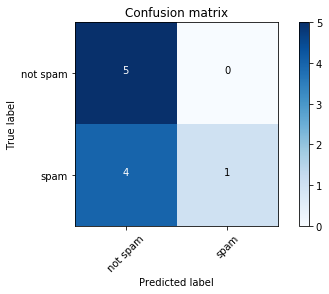

missclassification rate:  0.4


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

################################################################################
### I want to give credit for this plotting function to 
### http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
###
### All other code written in this cell is my own.
###
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    This function was taken from scikit-learn.org
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
##################################################################################

y_true = ["not spam", "not spam", "not spam", "not spam", "not spam", "spam", "spam", "spam", "spam", "spam"]
y_pred_num = [0.001, 0.100, 0.500, 0.600, 0.980, 0.400, 0.800, 0.900, 0.995, 0.99]

y_pred = []
for val in y_pred_num:
    if (val > 0.990):
        y_pred.append("spam")
    else:
        y_pred.append("not spam")
        

matrix = confusion_matrix(y_true, y_pred, labels=["not spam", "spam"])

plt.figure()
plot_confusion_matrix(matrix, classes=["not spam", "spam"])
plt.show()

print "missclassification rate: ", (float)(matrix[0][1] + matrix[1][0]) / len(y_true)

<img src="midterm10.png">

### Problem 10

In [19]:
import math

# IG(Y|X) = H(Y) - H(Y|X)
# Y - class, X - feature, H(Y) - entropy of class, H(Y|X) - entropy of Y conditioned on X


## X1
H_Y = -(4.0/8) * math.log(4.0/8, 2) - (4.0/8) * math.log(4.0/8, 2)

P_bello = 5.0/8
P_banana = 3.0/8

P_cool_bello = 3.0/5
P_lame_bello = 2.0/5
H_Y_bello = -P_cool_bello * math.log(P_cool_bello) - P_lame_bello * math.log(P_lame_bello) 

P_cool_banana = 1.0/3
P_lame_banana = 2.0/3
H_Y_banana = -P_cool_banana * math.log(P_cool_banana) - P_lame_banana * math.log(P_lame_banana)

H_Y_X1 = (P_bello * H_Y_bello) + (P_banana * H_Y_banana)

IG_Y_X1 = H_Y - H_Y_X1

print "Information gain of X1: ", IG_Y_X1

## X2
P_ron = 3.0/8
P_hermoine = 2.0/8
P_harry = 3.0/8

P_cool_ron = 2.0/3
P_lame_ron = 1.0/3
H_Y_ron = -P_cool_ron * math.log(P_cool_ron) - P_lame_ron * math.log(P_lame_ron) 

P_cool_hermoine = 0
P_lame_hermoine = 1
H_Y_hermoine = -P_cool_hermoine - P_lame_hermoine * math.log(P_lame_hermoine)

P_cool_harry = 2.0/3
P_lame_harry = 1.0/3
H_Y_harry = -P_cool_harry * math.log(P_cool_harry) - P_lame_harry * math.log(P_lame_harry) 


H_Y_X2 = (P_ron * H_Y_ron) + (P_hermoine * H_Y_hermoine) + (P_harry * H_Y_harry)

IG_Y_X2 = H_Y - H_Y_X2

print "Information gain of X2: ", IG_Y_X2

## X3
P_sauce = 4.0 / 8
P_yogurt = 2.0 /8
P_milk = 2.0/8

P_cool_sauce = 2.0/4
P_lame_sauce = 2.0/4
H_Y_sauce = -P_cool_sauce * math.log(P_cool_sauce) - P_lame_sauce * math.log(P_lame_sauce) 

P_cool_yogurt = 0
P_lame_yogurt = 1
H_Y_yogurt = -P_cool_yogurt - P_lame_yogurt * math.log(P_lame_yogurt)

P_cool_milk = 1
P_lame_milk = 0
H_Y_milk = -P_cool_milk * math.log(P_cool_milk) - P_lame_milk


H_Y_X3 = (P_sauce * H_Y_sauce) + (P_yogurt * H_Y_yogurt) + (P_milk * H_Y_milk)

IG_Y_X3 = H_Y - H_Y_X3

print "Information gain of X3: ", IG_Y_X3


Information gain of X1:  0.340674895009
Information gain of X2:  0.522614373779
Information gain of X3:  0.65342640972


Since the information gain for X3 is the highest, this Feature will be selected as the root node.

<img src="midterm11.png">

### Problem 11


<img src="midterm12.png">

### Problem 12

In [27]:
A = [1.0, 0.93, 1.0, 1.0,  0.86, 0.93, 0.93, 1.0,  1.0, 1.0]
B = [1.0, 0.93, 1.0, 0.93, 0.93, 0.86, 0.93, 0.93, 1.0, 1.0]
delta = []
for i in range(len(A)):
    delta.append(A[i] - B[i])

delta_m = 0
for d in delta:
   delta_m += d
delta_m /= len(delta)

sigma = 0 
for i in range(len(delta)):
    sigma += math.pow(delta[i] - delta_m , 2)


k = 10
s_delta_m = math.sqrt((1.0 / (k * (k - 1))) * sigma)

t = delta_m / s_delta_m
print t


1.0


Based on the table from page 117 of the Evalution slide deck, a t value of 1.0 shows that Model A is stastically significantly better at alpha = 0.2, but is not statistically significantly different at alpha = 0.1